# Avocado is a fruit consumed by people heavily in the United States. 

Task: One of Classification and other of Regression

# Importing Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.metrics import 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
#from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


After viewing the content in our dataset found that there is column 'Unnamed' & no mean to keep that column into our dataset.

# EDA

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(18249, 13)

In [5]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

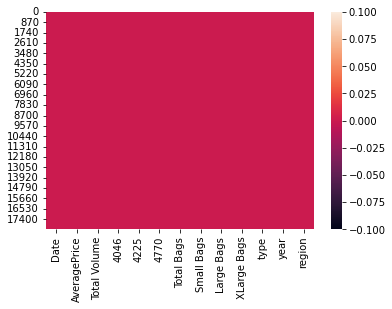

In [8]:
sns.heatmap(df.isnull())

we can see that there is no any null_value present in the any columns of our datasets.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


from this method we can see the type of data we are having in our dataset as per requirement we need to treat them

In [10]:
df.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There is no null values according to count column.
We do have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value

In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

As we can see that some of columns are highly skewed let us proceed with it later we will treat as per requirement.

In [13]:
df['month'],df['day'],df['Year']=df['Date'].str.split('/').str

In [14]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [15]:
df.drop(['year','Date'],axis=1,inplace=True)

In [16]:
df.shape

(18249, 14)

In [17]:
 df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2,4,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,1,28,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,1,21,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,1,14,2018


# Visualization
.Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

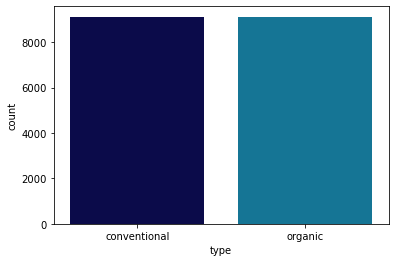

In [18]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='ocean')

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

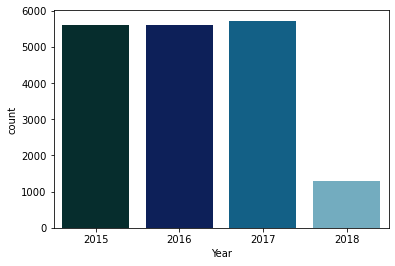

In [19]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df,palette='ocean')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

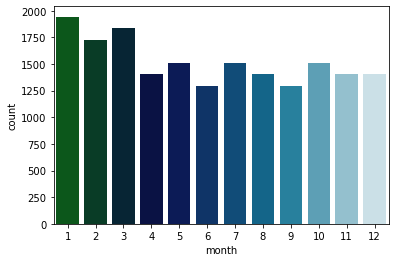

In [20]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='ocean')

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

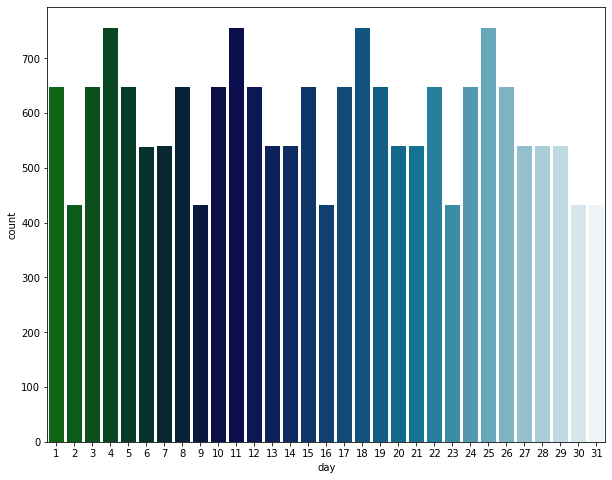

In [21]:
print(df['day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='day',data=df,palette='ocean')

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

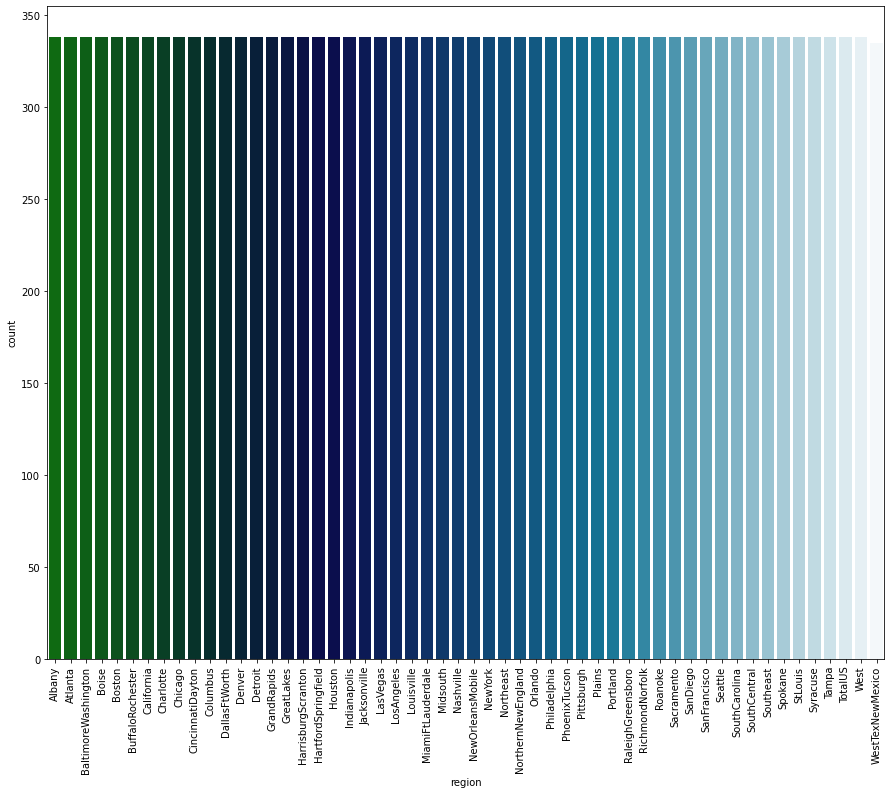

In [22]:
print(df['region'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='region',data=df,palette='ocean')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

<Figure size 1080x720 with 0 Axes>

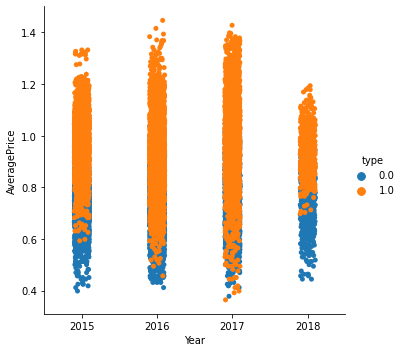

In [56]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df)
plt.show()

with the help of this catplot we can see that how organic Average price is more than conventional year after year

<Figure size 1080x720 with 0 Axes>

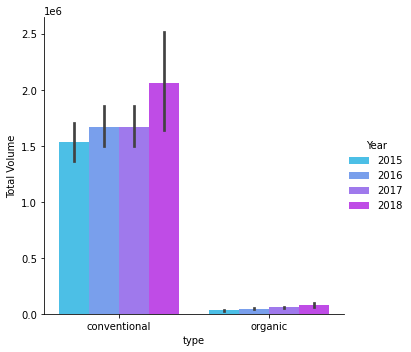

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="cool")
plt.show()

This plot is clearly displays that Totla volume of conventional type is every time higher than organic type.

<Figure size 1080x720 with 0 Axes>

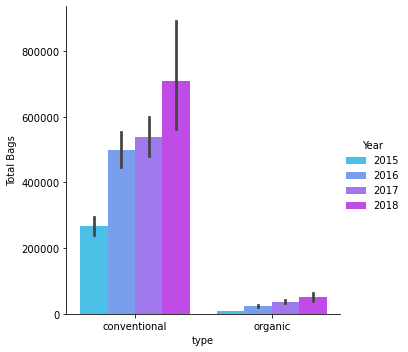

In [25]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="cool")
plt.show()

This show that Total Bags of conventional type has always been higher than organic type

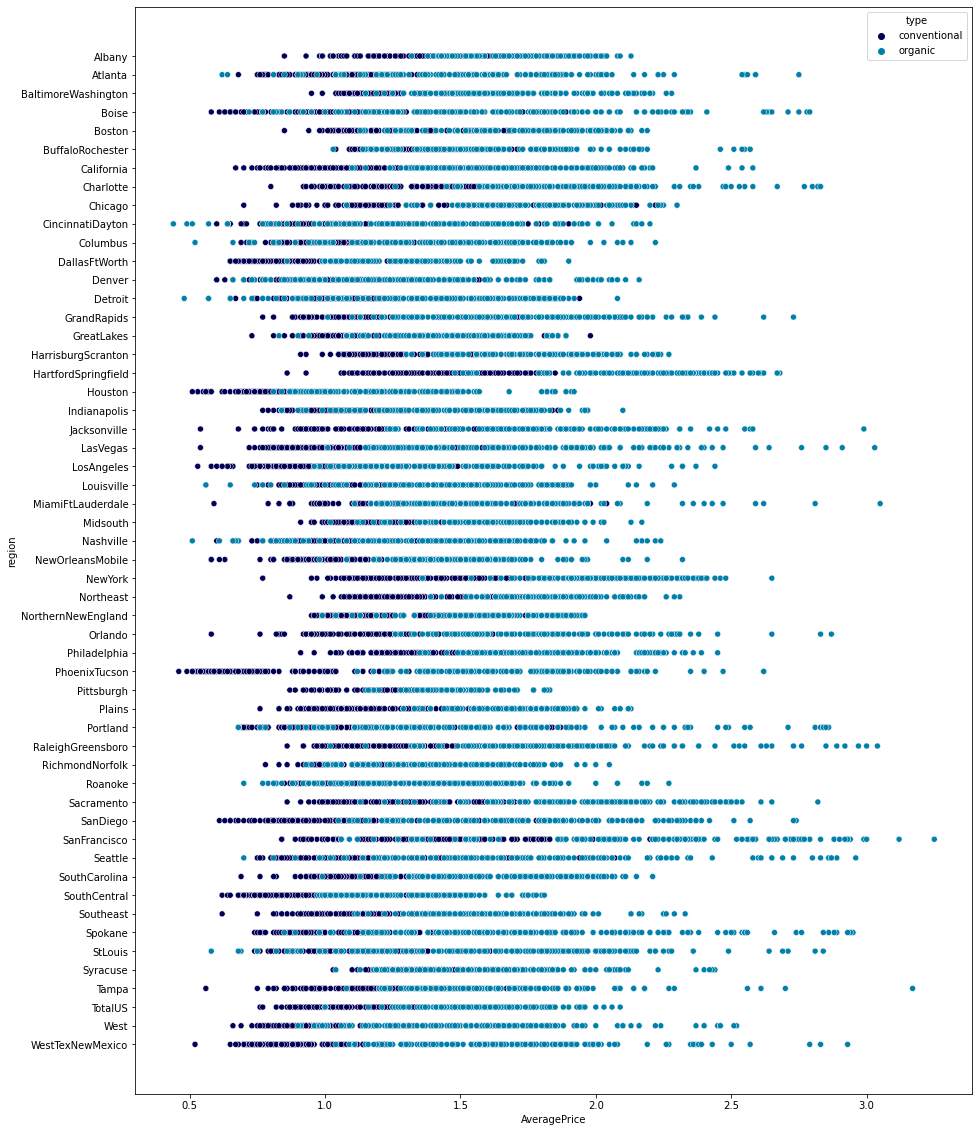

In [26]:
plt.figure(figsize=(15,20))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="ocean")
plt.show()

With the help of this scatterplot, we can say that the Average Price of every Region of organic type is always higher than that of conventional.

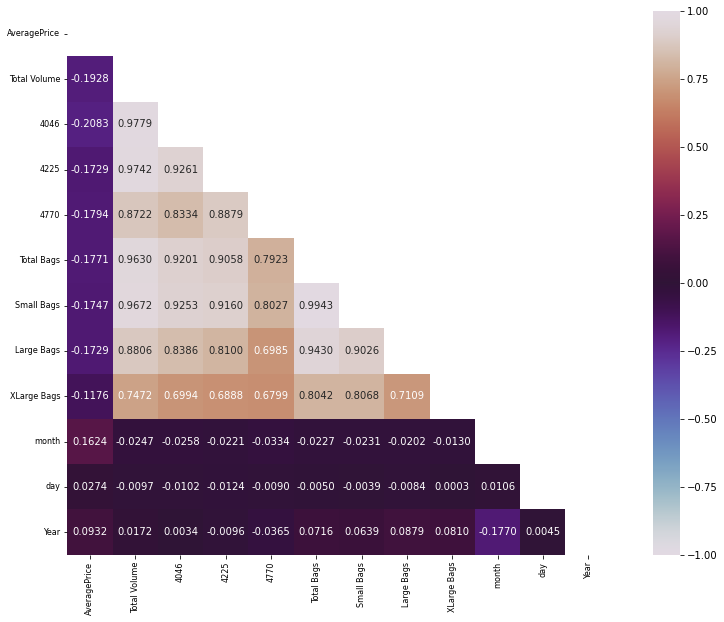

In [27]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.4f', 
            annot_kws={'size':10}, cmap="twilight", mask=upper_triangle)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


As heatmap of correlation of our dataset df is displaying that many of columns are highly correleted to each other means columns like, 4046,4225,4770 are highly correlated with Total Volume in this case we have to drop these columns ,similarly small Bags,Large Bags and Xlarge Bags are highly correleted with Totla Bags these columns also needs to be dropped in order to secure from multicollearnity problems

In [28]:
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,Total Bags,type,region,month,day,Year
0,1.33,64236.62,8696.87,conventional,Albany,12,27,2015
1,1.35,54876.98,9505.56,conventional,Albany,12,20,2015
2,0.93,118220.22,8145.35,conventional,Albany,12,13,2015
3,1.08,78992.15,5811.16,conventional,Albany,12,6,2015
4,1.28,51039.60,6183.95,conventional,Albany,11,29,2015
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,2,4,2018
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,1,28,2018
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,1,21,2018
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,1,14,2018


# Encoding

In [29]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,month,day,Year
0,1.33,64236.62,8696.87,0.0,0.0,12,27,2015
1,1.35,54876.98,9505.56,0.0,0.0,12,20,2015
2,0.93,118220.22,8145.35,0.0,0.0,12,13,2015
3,1.08,78992.15,5811.16,0.0,0.0,12,6,2015
4,1.28,51039.60,6183.95,0.0,0.0,11,29,2015
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2,4,2018
18245,1.71,13888.04,9264.84,1.0,53.0,1,28,2018
18246,1.87,13766.76,9394.11,1.0,53.0,1,21,2018
18247,1.93,16205.22,10969.54,1.0,53.0,1,14,2018


With the help of ordinalEncoder we have changed some object data to numric data as machine learning dont processed with object type data

# outliers

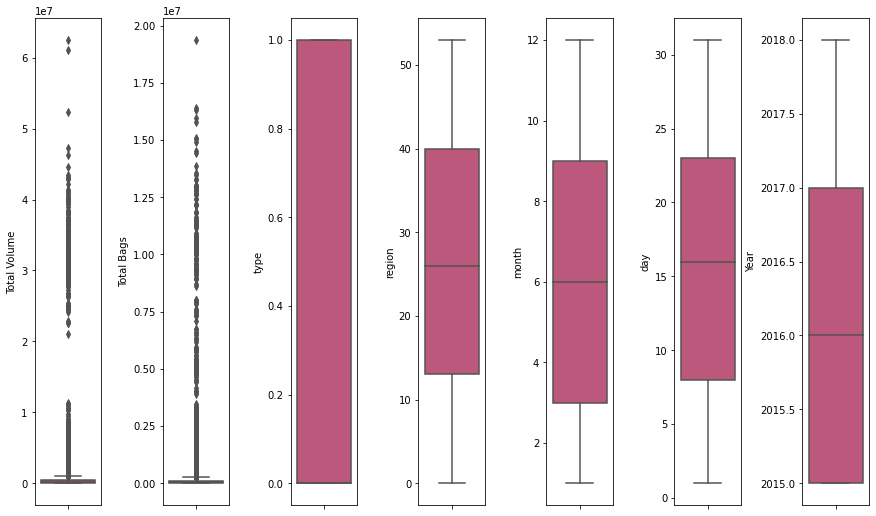

In [30]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

With the help of this boxplot we can see that there are some outlier present in features 'Total Volume' and 'Total Bags' that is need to be treated in next step

# Removing Outliers
zscore Method

In [31]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,Total Bags,type,region,month,day,Year
0,1.33,64236.62,8696.87,0.0,0.0,12,27,2015
1,1.35,54876.98,9505.56,0.0,0.0,12,20,2015
2,0.93,118220.22,8145.35,0.0,0.0,12,13,2015
3,1.08,78992.15,5811.16,0.0,0.0,12,6,2015
4,1.28,51039.60,6183.95,0.0,0.0,11,29,2015
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2,4,2018
18245,1.71,13888.04,9264.84,1.0,53.0,1,28,2018
18246,1.87,13766.76,9394.11,1.0,53.0,1,21,2018
18247,1.93,16205.22,10969.54,1.0,53.0,1,14,2018


In [32]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [33]:
df.shape,new_df.shape,


((18249, 8), (17931, 8))

In [34]:
(18249-17931)/18249*100

1.7425612362321221

# skewness

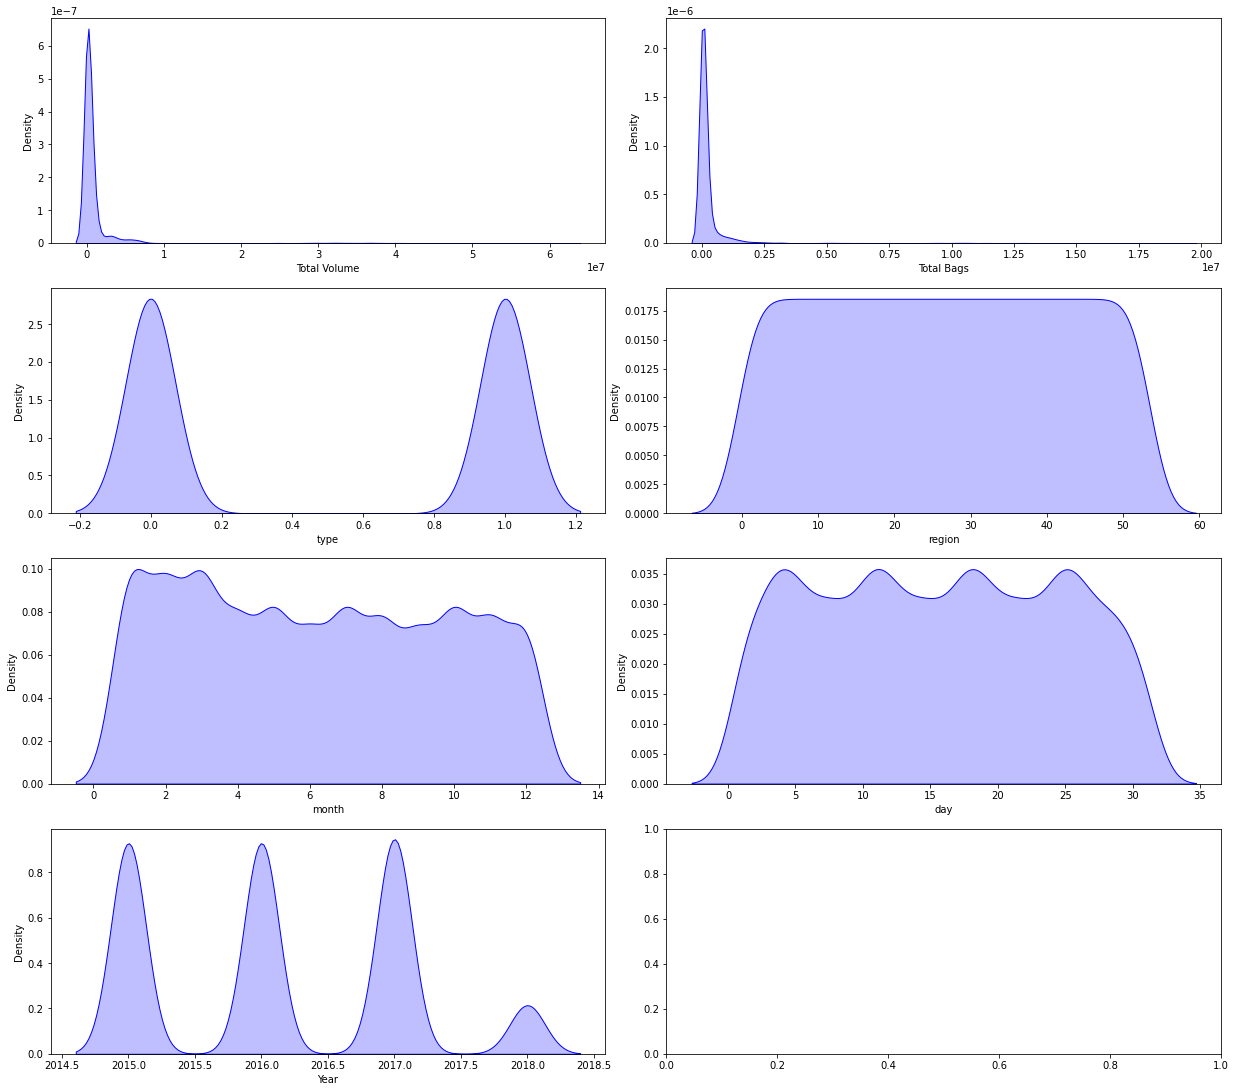

In [35]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(17,15))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Using LogTransform method to fix the skewness

In [36]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [37]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
month           0.106617
day             0.014310
Year            0.215339
dtype: float64

# Splitting Data into Two parts namely X and Y

In [38]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

# Feature Scaling

In [39]:
scale=StandardScaler()

In [40]:
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Total Volume,Total Bags,type,region,month,day,Year
0,-0.107282,-0.494074,-0.999836,-1.700252,1.647632,1.291857,-1.221282
1,-0.175949,-0.454761,-0.999836,-1.700252,1.647632,0.494231,-1.221282
2,0.158690,-0.523041,-0.999836,-1.700252,1.647632,-0.303396,-1.221282
3,-0.017121,-0.672335,-0.999836,-1.700252,1.647632,-1.101022,-1.221282
4,-0.207558,-0.644845,-0.999836,-1.700252,1.364669,1.519750,-1.221282
...,...,...,...,...,...,...,...
18244,-0.685006,-0.299689,1.000164,1.700811,-1.181997,-1.328915,1.970504
18245,-0.775077,-0.466102,1.000164,1.700811,-1.464959,1.405803,1.970504
18246,-0.778901,-0.459975,1.000164,1.700811,-1.464959,0.608177,1.970504
18247,-0.707798,-0.391424,1.000164,1.700811,-1.464959,-0.189449,1.970504


# Finding best random state to build Regression Model


In [41]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5154450113185596 on Random State 672


# Train_test_split

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)


# Machine Learning Model for Regression and Evaluation metrics


In [43]:
def reg(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)
    
    #model fitting
    model.fit(X_train,Y_train)
    
    #predicting the model
    pred=model.predict(X_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,Y_test))
    
    #R2_score
    r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)


In [44]:
# Linear regression
model=LinearRegression()
reg(model,x,y)

mean square error 0.013474534166490987
r2_score -2.091626997819529
cv score  14.362453555163917
final score = -16.454080552983445


In [45]:
#Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.0029860512544509217
r2_score 86.7241490435034
cv score  11.073794246111705
final score = 75.6503547973917


In [46]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.012532485181522444
r2_score -4.599889611978281
cv score  10.051185685093685
final score = -14.651075297071966


In [47]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.009186826366427633
r2_score 47.28972121574038
cv score  -20.277219104851646
final score = 67.56694032059202


In [48]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.0027171397491181784
r2_score 88.53316096460759
cv score  43.43440781675646
final score = 45.09875314785113


In [49]:
#dtr
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.006040342024836673
r2_score 78.20594991899713
cv score  -17.53152936478158
final score = 95.73747928377871


In [50]:
#Lasso
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.027812853228557987
r2_score -2.2564467257114354e+32
cv score  -103.77105535400972
final score = -2.2564467257114354e+32


In [51]:
#Ridge
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.013474675702694488
r2_score -2.111965950391226
cv score  14.365774566244655
final score = -16.47774051663588


# Hyper parameter tuning for best ML model

In [52]:
#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [53]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)
GSCV.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [54]:
 GSCV.best_score_

0.5780035823390738

Hence gridsearchcv has provided us best detail of our best model

In [55]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)


R2 score for the Best Model is: 64.3928301016917


# Conclusion
The best Accuracy is at DecisionTreeRegressor having 95.73%.

# Saving Model1
Saving DecisionTreeRegressor Model as it has highest accuracy of 95.73%

In [87]:
from sklearn.metrics import mean_absolute_error
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr_y=dtr.predict(X_test)
print("Accuracy Score",r2_score(Y_test,dtr_y))
print("Mean Absolute Error", mean_absolute_error(Y_test,dtr_y))
print("Root Mean Squared Error", (mean_squared_error(Y_test,dtr_y))**0.5 )

Accuracy Score 0.7889117212384613
Mean Absolute Error 0.05179562127096702
Root Mean Squared Error 0.0766156348738976


In [91]:
import pickle

filename='Avocado_AveragePrice_rfr.pkl'
pickle.dump(rfr,open(filename,'wb'))

# Model2
Region as Target variable

As Region is a discrete value, this model will be a classification type.

In [57]:
new_df

,AveragePrice,Total Volume,Total Bags,type,region,month,day,Year
0,1.33,64236.62,8696.87,0.0,0.0,12,27,2015
1,1.35,54876.98,9505.56,0.0,0.0,12,20,2015
2,0.93,118220.22,8145.35,0.0,0.0,12,13,2015
3,1.08,78992.15,5811.16,0.0,0.0,12,6,2015
4,1.28,51039.60,6183.95,0.0,0.0,11,29,2015
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2,4,2018
18245,1.71,13888.04,9264.84,1.0,53.0,1,28,2018
18246,1.87,13766.76,9394.11,1.0,53.0,1,21,2018
18247,1.93,16205.22,10969.54,1.0,53.0,1,14,2018


In [58]:
x1=new_df.drop(['region'],axis=1)
x1

,AveragePrice,Total Volume,Total Bags,type,month,day,Year
0,1.33,64236.62,8696.87,0.0,12,27,2015
1,1.35,54876.98,9505.56,0.0,12,20,2015
2,0.93,118220.22,8145.35,0.0,12,13,2015
3,1.08,78992.15,5811.16,0.0,12,6,2015
4,1.28,51039.60,6183.95,0.0,11,29,2015
...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,2,4,2018
18245,1.71,13888.04,9264.84,1.0,1,28,2018
18246,1.87,13766.76,9394.11,1.0,1,21,2018
18247,1.93,16205.22,10969.54,1.0,1,14,2018


In [59]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x1=scaler.fit_transform(x1)
scaled_x1=pd.DataFrame(scaled_x1)
scaled_x1

,0,1,2,3,4,5,6
0,-0.179547,-0.396584,-0.413139,-1.002960,1.650340,1.291781,-1.215795
1,-0.127800,-0.404396,-0.410836,-1.002960,1.650340,0.493909,-1.215795
2,-1.214487,-0.351527,-0.414710,-1.002960,1.650340,-0.303964,-1.215795
3,-0.826385,-0.384268,-0.421359,-1.002960,1.650340,-1.101837,-1.215795
4,-0.308915,-0.407599,-0.420297,-1.002960,1.367566,1.519745,-1.215795
...,...,...,...,...,...,...,...
17926,0.596657,-0.435947,-0.399462,0.997049,-1.177395,-1.329801,1.973888
17927,0.803645,-0.438606,-0.411522,0.997049,-1.460168,1.405763,1.973888
17928,1.217621,-0.438708,-0.411153,0.997049,-1.460168,0.607890,1.973888
17929,1.372862,-0.436672,-0.406666,0.997049,-1.460168,-0.189982,1.973888


In [60]:
y1=pd.DataFrame(new_df['region'])
y1

,region
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
18244,53.0
18245,53.0
18246,53.0
18247,53.0


# Finding best random state

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
best_r_state1=0
accu1=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_x1,y1,test_size=0.25,random_state=i)
    md=LogisticRegression()
    md.fit(x_train,y_train)
    y_pred=md.predict(x_test)
    tempaccu1=r2_score(y_test,y_pred)
    if tempaccu1>accu1:
        accu1=tempaccu1
        best_r_state1=i

print(f"Best random_state {best_r_state1}")

Best random_state 0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x1,y1,test_size=0.25,random_state=189)

In [65]:
modelclf=[LogisticRegression()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of LogisticRegression() is 0.18938211019406648
Confusion Matrix
 [[29  0  0 ...  0  0  0]
 [ 2  3  0 ...  0  0  0]
 [ 1  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 28 13  0]
 [ 0  0  0 ...  0 36  0]
 [ 1  0  0 ...  0  0  8]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.13      0.36      0.19        80
         1.0       0.17      0.04      0.06        79
         2.0       0.55      0.35      0.43        78
         3.0       0.12      0.13      0.13        85
         4.0       0.23      0.08      0.12        83
         5.0       0.22      0.24      0.23        80
         6.0       0.44      0.35      0.39        97
         7.0       0.14      0.10      0.11        84
         8.0       0.29      0.21      0.25        99
         9.0       0.28      0.23      0.25        95
        10.0       0.02      0.07      0.03        72
        11.0       0.23      0.10      0.14        90
        12.0       0.10      0.16     

In [68]:
modelclf=[KNeighborsClassifier()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of KNeighborsClassifier() is 0.08521079634173545
Confusion Matrix
 [[ 1  6  6 ...  0  0  0]
 [ 5  5  6 ...  0  0  0]
 [ 6 10 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  1  0]
 [ 1  3  3 ...  0 31  0]
 [ 6 14  1 ...  0  0  1]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.00      0.01      0.00        79
         1.0       0.01      0.06      0.02        78
         2.0       0.05      0.13      0.07        90
         3.0       0.03      0.08      0.04        95
         4.0       0.01      0.04      0.02        83
         5.0       0.03      0.06      0.04        96
         6.0       0.23      0.44      0.30        85
         7.0       0.00      0.00      0.00        69
         8.0       0.03      0.05      0.04        86
         9.0       0.02      0.05      0.02        86
        10.0       0.00      0.00      0.00        83
        11.0       0.06      0.13      0.08        79
        12.0       0.11      0.07   

In [69]:
modelclf=[DecisionTreeClassifier()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of DecisionTreeClassifier() is 0.4621904974347535
Confusion Matrix
 [[47  0  0 ...  0  0  0]
 [ 0 24  1 ...  0  0  1]
 [ 0  1 57 ...  0  0  3]
 ...
 [ 0  0  0 ... 30  0  0]
 [ 0  0  0 ...  1 74  0]
 [ 0  4  3 ...  0  0 30]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.58      0.59      0.59        79
         1.0       0.23      0.31      0.27        78
         2.0       0.54      0.63      0.58        90
         3.0       0.46      0.51      0.48        95
         4.0       0.56      0.40      0.46        83
         5.0       0.58      0.51      0.54        96
         6.0       0.74      0.71      0.72        85
         7.0       0.37      0.41      0.39        69
         8.0       0.66      0.66      0.66        86
         9.0       0.29      0.28      0.28        86
        10.0       0.24      0.28      0.26        83
        11.0       0.45      0.48      0.47        79
        12.0       0.59      0.47  

In [70]:
modelclf=[SVC()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of SVC() is 0.1670756190051305
Confusion Matrix
 [[ 7  0  0 ...  0  0  0]
 [ 1  8  0 ...  0  0  5]
 [ 1  0 33 ...  0  0  1]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 1  3  0 ...  0  0 27]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.07      0.09      0.08        79
         1.0       0.14      0.10      0.12        78
         2.0       0.47      0.37      0.41        90
         3.0       0.00      0.00      0.00        95
         4.0       0.01      0.01      0.01        83
         5.0       0.00      0.00      0.00        96
         6.0       0.48      0.48      0.48        85
         7.0       0.05      0.14      0.08        69
         8.0       0.11      0.10      0.11        86
         9.0       0.10      0.03      0.05        86
        10.0       0.05      0.06      0.06        83
        11.0       0.11      0.35      0.17        79
        12.0       0.39      0.11      0.17       102


In [71]:
modelclf=[RandomForestClassifier()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of RandomForestClassifier() is 0.536917242917689
Confusion Matrix
 [[59  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  3]
 [ 0  0 65 ...  0  0  4]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  1 78  0]
 [ 0  0  0 ...  0  0 45]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.70      0.75      0.72        79
         1.0       0.35      0.38      0.37        78
         2.0       0.74      0.72      0.73        90
         3.0       0.55      0.55      0.55        95
         4.0       0.55      0.67      0.61        83
         5.0       0.68      0.52      0.59        96
         6.0       0.79      0.82      0.80        85
         7.0       0.44      0.59      0.51        69
         8.0       0.68      0.85      0.75        86
         9.0       0.39      0.40      0.39        86
        10.0       0.29      0.34      0.31        83
        11.0       0.47      0.59      0.53        79
        12.0       0.67      0.55   

In [72]:
modelclf=[AdaBoostClassifier()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of AdaBoostClassifier() is 0.031675217488289095
Confusion Matrix
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0 32 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        79
         1.0       0.00      0.00      0.00        78
         2.0       0.00      0.00      0.00        90
         3.0       0.00      0.00      0.00        95
         4.0       0.00      0.00      0.00        83
         5.0       0.00      0.00      0.00        96
         6.0       0.00      0.00      0.00        85
         7.0       0.02      1.00      0.05        69
         8.0       0.00      0.00      0.00        86
         9.0       0.00      0.00      0.00        86
        10.0       0.00      0.00      0.00        83
        11.0       0.02      0.05      0.03        79
        12.0       0.00      0.00    

In [73]:
modelclf=[GradientBoostingClassifier()]
for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))

Accuracy Score of GradientBoostingClassifier() is 0.4276154360919027
Confusion Matrix
 [[52  0  0 ...  0  0  0]
 [ 0 17  3 ...  0  0  4]
 [ 0  0 64 ...  0  0  2]
 ...
 [ 0  0  0 ... 31  1  0]
 [ 0  0  0 ...  1 64  0]
 [ 0  4  6 ...  0  0 29]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.66      0.64        79
         1.0       0.24      0.22      0.23        78
         2.0       0.56      0.71      0.62        90
         3.0       0.57      0.39      0.46        95
         4.0       0.46      0.60      0.52        83
         5.0       0.44      0.46      0.45        96
         6.0       0.65      0.64      0.64        85
         7.0       0.30      0.43      0.36        69
         8.0       0.62      0.72      0.67        86
         9.0       0.31      0.31      0.31        86
        10.0       0.20      0.13      0.16        83
        11.0       0.45      0.66      0.54        79
        12.0       0.50      0.

RandomForestClassifier has highest as 53.69%

As MultinomialNB doesnt support negative values. Let's try x1 instead of scaled_x1

In [74]:
x1

,AveragePrice,Total Volume,Total Bags,type,month,day,Year
0,1.33,64236.62,8696.87,0.0,12,27,2015
1,1.35,54876.98,9505.56,0.0,12,20,2015
2,0.93,118220.22,8145.35,0.0,12,13,2015
3,1.08,78992.15,5811.16,0.0,12,6,2015
4,1.28,51039.60,6183.95,0.0,11,29,2015
...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,2,4,2018
18245,1.71,13888.04,9264.84,1.0,1,28,2018
18246,1.87,13766.76,9394.11,1.0,1,21,2018
18247,1.93,16205.22,10969.54,1.0,1,14,2018


In [75]:
y1

,region
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
18244,53.0
18245,53.0
18246,53.0
18247,53.0


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=189)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb_y=mnb.predict(x_test)

print("Accuracy Score of MultinomialNB is",accuracy_score(y_test,mnb_y))
print("Confusion Matrix\n",confusion_matrix(y_test,mnb_y))
print("Classification Report\n", classification_report(y_test,mnb_y))

Accuracy Score of MultinomialNB is 0.0455052420254294
Confusion Matrix
 [[13  0  0 ...  0  0  0]
 [ 5  1  0 ...  2  0  1]
 [ 9  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  1]
 [ 1  0  0 ... 16 17  0]
 [ 6  0  0 ...  0  0  0]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.04      0.16      0.06        79
         1.0       0.01      0.01      0.01        78
         2.0       0.00      0.00      0.00        90
         3.0       0.00      0.00      0.00        95
         4.0       0.02      0.01      0.01        83
         5.0       0.02      0.09      0.04        96
         6.0       0.07      0.04      0.05        85
         7.0       0.00      0.00      0.00        69
         8.0       0.14      0.20      0.17        86
         9.0       0.01      0.01      0.01        86
        10.0       0.00      0.00      0.00        83
        11.0       0.00      0.00      0.00        79
        12.0       0.06      0.07      0.07   

4.5% Accuracy in MultiNomialNB.

# Conclusion

RandomForestClassifier has the highest Accuracy of 53.69%

Let's save this model.

In [79]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y=rfc.predict(x_test)

print("Accuracy Score of RandomForestClassifier is",accuracy_score(y_test,rfc_y))
print("Confusion Matrix\n",confusion_matrix(y_test,rfc_y))
print("Classification Report\n", classification_report(y_test,rfc_y))

Accuracy Score of RandomForestClassifier is 0.539370956948472
Confusion Matrix
 [[59  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  3]
 [ 0  0 67 ...  0  0  5]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  1 77  0]
 [ 0  1  0 ...  0  0 46]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        79
         1.0       0.37      0.44      0.40        78
         2.0       0.78      0.74      0.76        90
         3.0       0.54      0.53      0.53        95
         4.0       0.55      0.65      0.60        83
         5.0       0.67      0.53      0.59        96
         6.0       0.80      0.84      0.82        85
         7.0       0.41      0.62      0.49        69
         8.0       0.70      0.86      0.77        86
         9.0       0.39      0.43      0.41        86
        10.0       0.32      0.30      0.31        83
        11.0       0.45      0.63      0.53        79
        12.0       0.70      0.58     

# Saving Model2
Saving RandomForestClassifier Model()

In [80]:
import pickle

filename='Avocado_Region_rfc.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [82]:
loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([36., 32.,  6., ..., 39., 53., 52.])